# Genetik Algoritma ile Optimizasyon – Senaryo 2 (Endüstriyel Boya Karışımı)

Ad Soyad: Ruken Nujin Balyen   
No : 2212721012

GitHub: https://github.com/nujinbalyenZ21/genetik_optimizasyonu

---


Amaç fonksiyonu:
y = 5x1 + 2x2 - x1*x2

Kısıtlar:
- x1 + x2 = 100
- x1 ≥ 30
- x1, x2 aralığı [0, 100]


In [1]:
import random
import math

random.seed(42)


x1 + x2 = 100 olduğu için:
- x2 = 100 - x1

Böylece kromozom olarak sadece x1 tutabiliriz.

Ayrıca x1 ≥ 30 olduğundan arama aralığımız:
- x1 elemanı [30, 100]


In [2]:
def kalite_puani(x1):
    
    x2 = 100 - x1
    y = 5*x1 + 2*x2 - (x1*x2)
    return y


test_x1 = 30
print("x1 =", test_x1, "x2 =", 100-test_x1, "kalite =", kalite_puani(test_x1))


x1 = 30 x2 = 70 kalite = -1810


In [3]:
def birey_olustur():
    
    return random.uniform(30, 100)

def populasyon_olustur(adet):
    pop = []
    for i in range(adet):
        pop.append(birey_olustur())
    return pop


pop_test = populasyon_olustur(5)
print("Test popülasyonu:", pop_test)


Test popülasyonu: [74.75987589205187, 31.750752865586687, 49.252052285838346, 45.624751670417595, 81.55298499148087]


In [4]:
def populasyonu_sirala(pop):
    
    return sorted(pop, key=kalite_puani, reverse=True)


sirali_pop = populasyonu_sirala(pop_test)

print("Sıralı popülasyon:")
for x1 in sirali_pop:
    print("x1 =", round(x1,2), " kalite =", round(kalite_puani(x1),2))


Sıralı popülasyon:
x1 = 81.55  kalite = -1059.75
x1 = 74.76  kalite = -1462.67
x1 = 31.75  kalite = -1871.71
x1 = 45.62  kalite = -2143.98
x1 = 49.25  kalite = -2151.68


In [5]:
def caprazlama(ebeveyn1, ebeveyn2):
    # iki bireyin ortalaması alınır
    cocuk = (ebeveyn1 + ebeveyn2) / 2
    return cocuk

# test
cocuk_test = caprazlama(sirali_pop[0], sirali_pop[1])
print("Çaprazlama sonucu x1:", cocuk_test)


Çaprazlama sonucu x1: 78.15643044176636


In [6]:
def mutasyon(x1, oran=0.1):
    if random.random() < oran:
        degisim = random.uniform(-5, 5)
        x1 = x1 + degisim

    # sınırları koru
    if x1 < 30:
        x1 = 30
    if x1 > 100:
        x1 = 100

    return x1

# test
for i in range(5):
    print("Mutasyonlu birey:", mutasyon(cocuk_test))


Mutasyonlu birey: 78.15643044176636
Mutasyonlu birey: 78.15643044176636
Mutasyonlu birey: 77.37564863861907
Mutasyonlu birey: 75.34281018980239
Mutasyonlu birey: 78.15643044176636


In [7]:
def yeni_nesil_uret(pop, elit_sayi=5, hedef_boyut=30, mut_oran=0.1):
    pop = populasyonu_sirala(pop)


    yeni_pop = pop[:elit_sayi]


    while len(yeni_pop) < hedef_boyut:

        ebeveyn1, ebeveyn2 = random.sample(pop[:15], 2)

        cocuk = caprazlama(ebeveyn1, ebeveyn2)
        cocuk = mutasyon(cocuk, oran=mut_oran)

        yeni_pop.append(cocuk)

    return yeni_pop


pop0 = populasyon_olustur(30)
pop1 = yeni_nesil_uret(pop0)

en_iyi0 = populasyonu_sirala(pop0)[0]
en_iyi1 = populasyonu_sirala(pop1)[0]

print("Başlangıç en iyi x1:", round(en_iyi0,2), "kalite:", round(kalite_puani(en_iyi0),2))
print("1 nesil sonrası en iyi x1:", round(en_iyi1,2), "kalite:", round(kalite_puani(en_iyi1),2))


Başlangıç en iyi x1: 98.12 kalite: 309.71
1 nesil sonrası en iyi x1: 98.12 kalite: 309.71


In [8]:
pop = populasyon_olustur(30)

nesil_sayisi = 100
en_iyi_gecmis = []  

for nesil in range(nesil_sayisi):
    pop = yeni_nesil_uret(pop, elit_sayi=5, hedef_boyut=30, mut_oran=0.1)

    en_iyi = populasyonu_sirala(pop)[0]
    en_iyi_gecmis.append(kalite_puani(en_iyi))


en_iyi = populasyonu_sirala(pop)[0]
x1_en = en_iyi
x2_en = 100 - x1_en
y_en = kalite_puani(x1_en)

print("EN IYI COZUM")
print("x1 =", round(x1_en,2))
print("x2 =", round(x2_en,2))
print("kalite puani =", round(y_en,2))
print("son nesilde en iyi fitness =", round(en_iyi_gecmis[-1],2))


EN IYI COZUM
x1 = 100
x2 = 0
kalite puani = 500
son nesilde en iyi fitness = 500


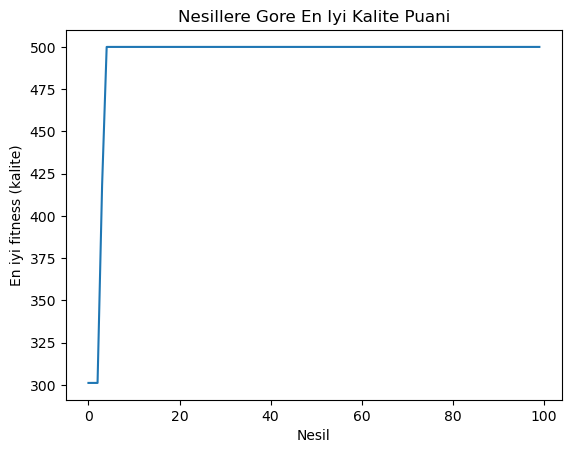

In [9]:
import matplotlib.pyplot as plt

plt.plot(en_iyi_gecmis)
plt.title("Nesillere Gore En Iyi Kalite Puani")
plt.xlabel("Nesil")
plt.ylabel("En iyi fitness (kalite)")
plt.show()